# **Foundations for Data Science Project : FoodHub Data Analysis**


### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [ ]:
# Imported libraries for data manipulation.
import numpy as np
import pandas as pd

# Imported libraries for data visualization.
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Suppressing warnings.
import warnings
warnings.filterwarnings('ignore')

### Understanding the structure of the data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# read the data
df = pd.read_csv('/content/drive/MyDrive/MIT/Foundations of Data Science/Project/foodhub_order.csv')

# returns the first 5 rows
df.head()


,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


#### **Observations:**

The DataFrame has 9 columns as mentioned in the Data Dictionary. Data in each row corresponds to the order placed by a customer.

### **Question 1:** How many rows and columns are present in the data?

In [ ]:
# "DataFrame.shape" returns a tuple representing the dimensions of the DataFrame.
df.shape

(1898, 9)

#### **Observations:**
By using the function pandas.DataFrame.shape or df.shape we can see the dimensions of the dataset, where the first element shows the number of rows and the second element the number of columns.


### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used)

In [ ]:
# Use "info()"" to print a concise summary of the DataFrame.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### **Observations:**
There are three different data types - int64 (represents numerical variables), object (represents categorical variables) and float64 (represent 64-bit double-precision vaalues)


### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method

In [ ]:
# "DataFrame.isnull().values.any()"" returns a boolean value for any missing data.
df.isnull().values.any()

False

#### **Observations:**
By using df.isnull().values.any() we can determine that there are no missing values in the dataset

### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed?

In [ ]:
# "DataFrame.describe()"" returns a description of the data in the DataFrame.
df.describe()

,order_id,customer_id,cost_of_the_order,food_preparation_time,delivery_time
count,1.898000e+03,1898.000000,1898.000000,1898.000000,1898.000000
mean,1.477496e+06,171168.478398,16.498851,27.371970,24.161749
std,5.480497e+02,113698.139743,7.483812,4.632481,4.972637
min,1.476547e+06,1311.000000,4.470000,20.000000,15.000000
25%,1.477021e+06,77787.750000,12.080000,23.000000,20.000000
50%,1.477496e+06,128600.000000,14.140000,27.000000,25.000000
75%,1.477970e+06,270525.000000,22.297500,31.000000,28.000000
max,1.478444e+06,405334.000000,35.410000,35.000000,33.000000


#### **Observations:**
df.describe() gave us the values for the minimum, average, and maximum time it takes for food to be prepared once an order is placed

* Min: 20 min
* Mean: 27.37 min
* Max: 35 min








### **Question 5:** How many orders are not rated?

In [ ]:
# "value_counts()" function counts the values present in the entire dataframe.
df['rating'].value_counts()

Not given    736
5            588
4            386
3            188
Name: rating, dtype: int64

#### **Observations:**
By using df['rating'].value_counts() we can see the total and specific amount of ratings, in this case we can see that there are 736 orders that are not rated

We can also use df['rating'].value_counts()['Not Given'], by specifying the value we are interested in python would return the specific count of said value (736)

### **Exploratory Data Analysis (EDA)**

### **Univariate Analysis**

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration)

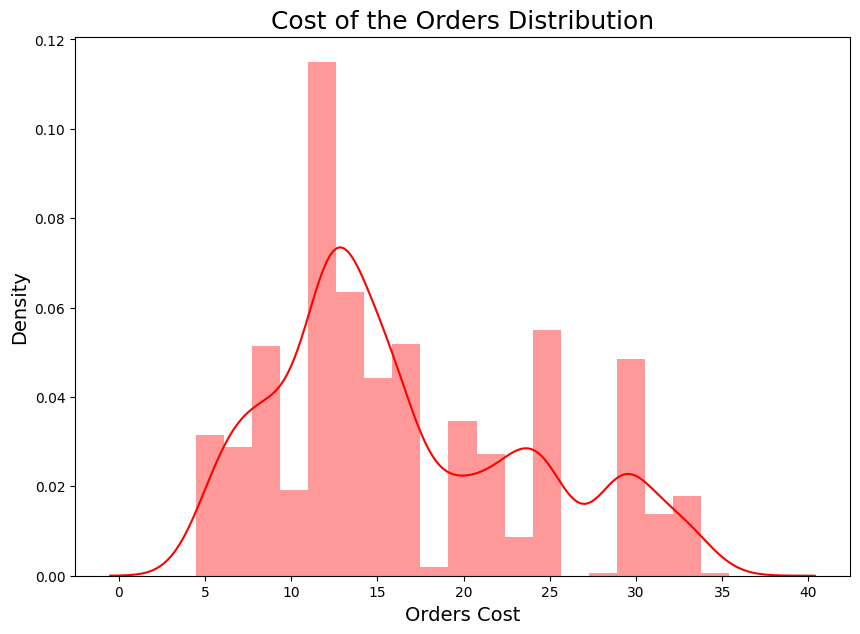

In [ ]:
# Cost of the Orders Distribution plot.
# "sns.distplot()" function returns a distribution and density plot for analysis.
plt.figure(figsize=(10,7))
sns.distplot(df.cost_of_the_order,color='r')
plt.title('Cost of the Orders Distribution',size=18)
plt.xlabel('Orders Cost',size=14)
plt.ylabel('Density',size=14)
plt.show()


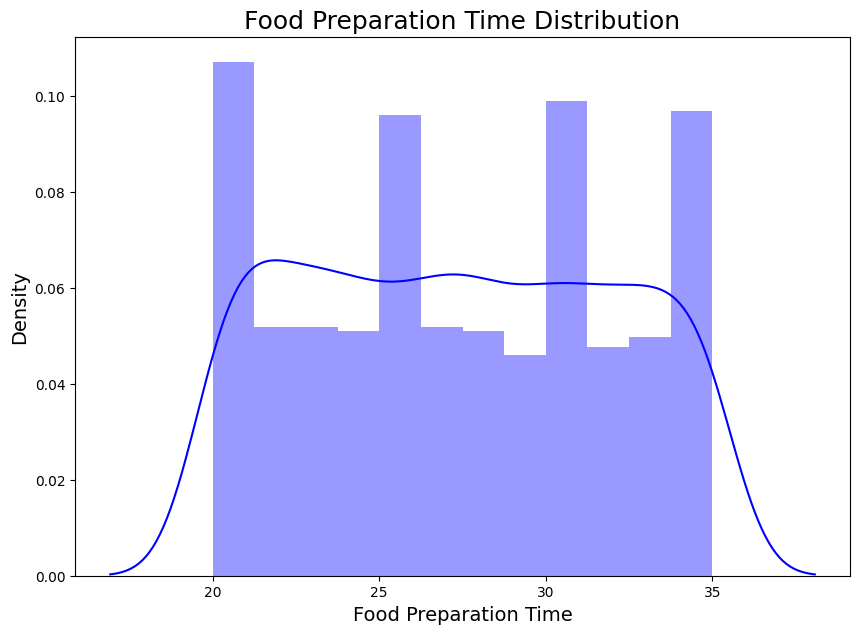

In [ ]:
# Food Preparation Time distribution plot.
plt.figure(figsize=(10,7))
sns.distplot(df.food_preparation_time,color='b')
plt.title('Food Preparation Time Distribution',size=18)
plt.xlabel('Food Preparation Time',size=14)
plt.ylabel('Density',size=14)
plt.show()

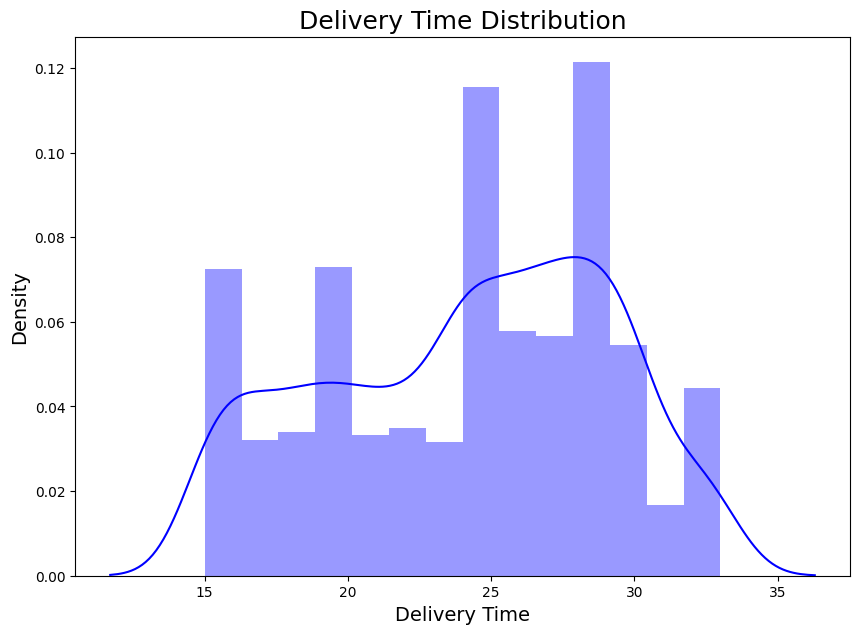

In [ ]:
# Delivery Time distribution plot.
plt.figure(figsize=(10,7))
sns.distplot(df.delivery_time,color='b')
plt.title('Delivery Time Distribution',size=18)
plt.xlabel('Delivery Time',size=14)
plt.ylabel('Density',size=14)
plt.show()

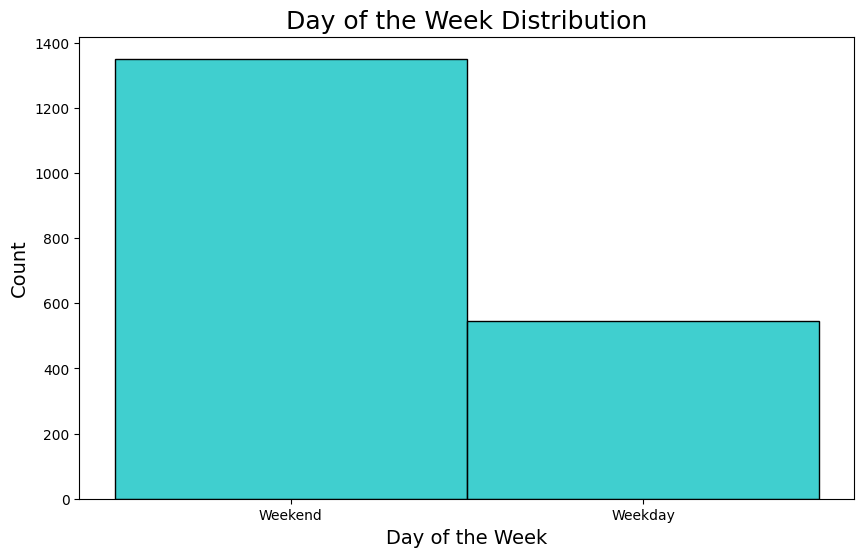

In [ ]:
# Day of the Week distribution plot.
# "sns.histplot()" function returns a comparison plot.
plt.figure(figsize=(10,6))
sns.histplot(df.day_of_the_week, color= 'c')
plt.title('Day of the Week Distribution',size=18)
plt.xlabel('Day of the Week',size=14)
plt.ylabel('Count',size=14)
plt.show()


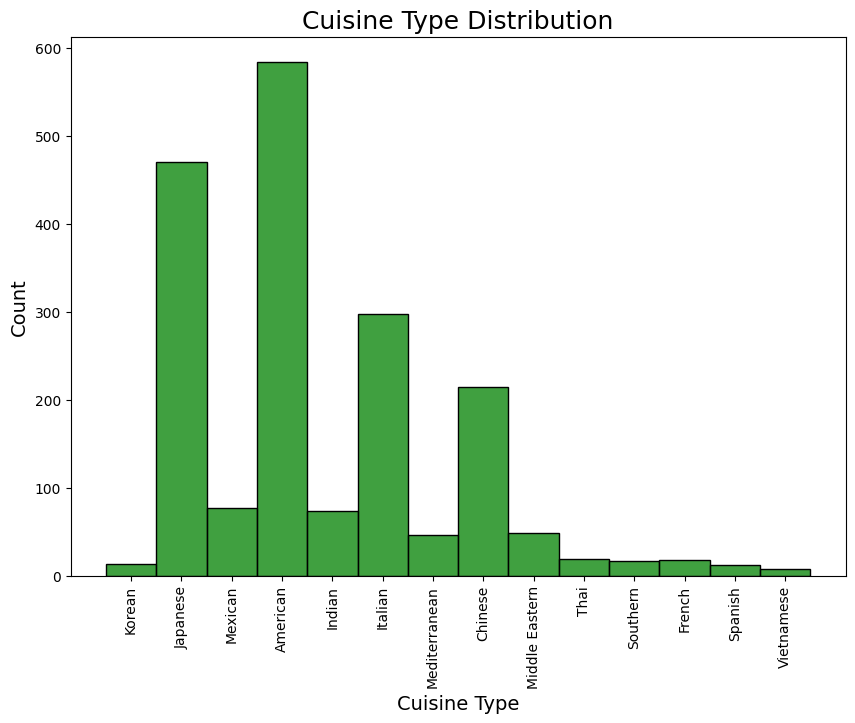

In [ ]:
# Cuisine Type Distribution plot.
plt.figure(figsize=(10,7))
sns.histplot(df.cuisine_type, color= 'g')
plt.title('Cuisine Type Distribution',size=18)
plt.xlabel('Cuisine Type',size=14)
plt.ylabel('Count',size=14)
plt.xticks(rotation=90)
plt.show()

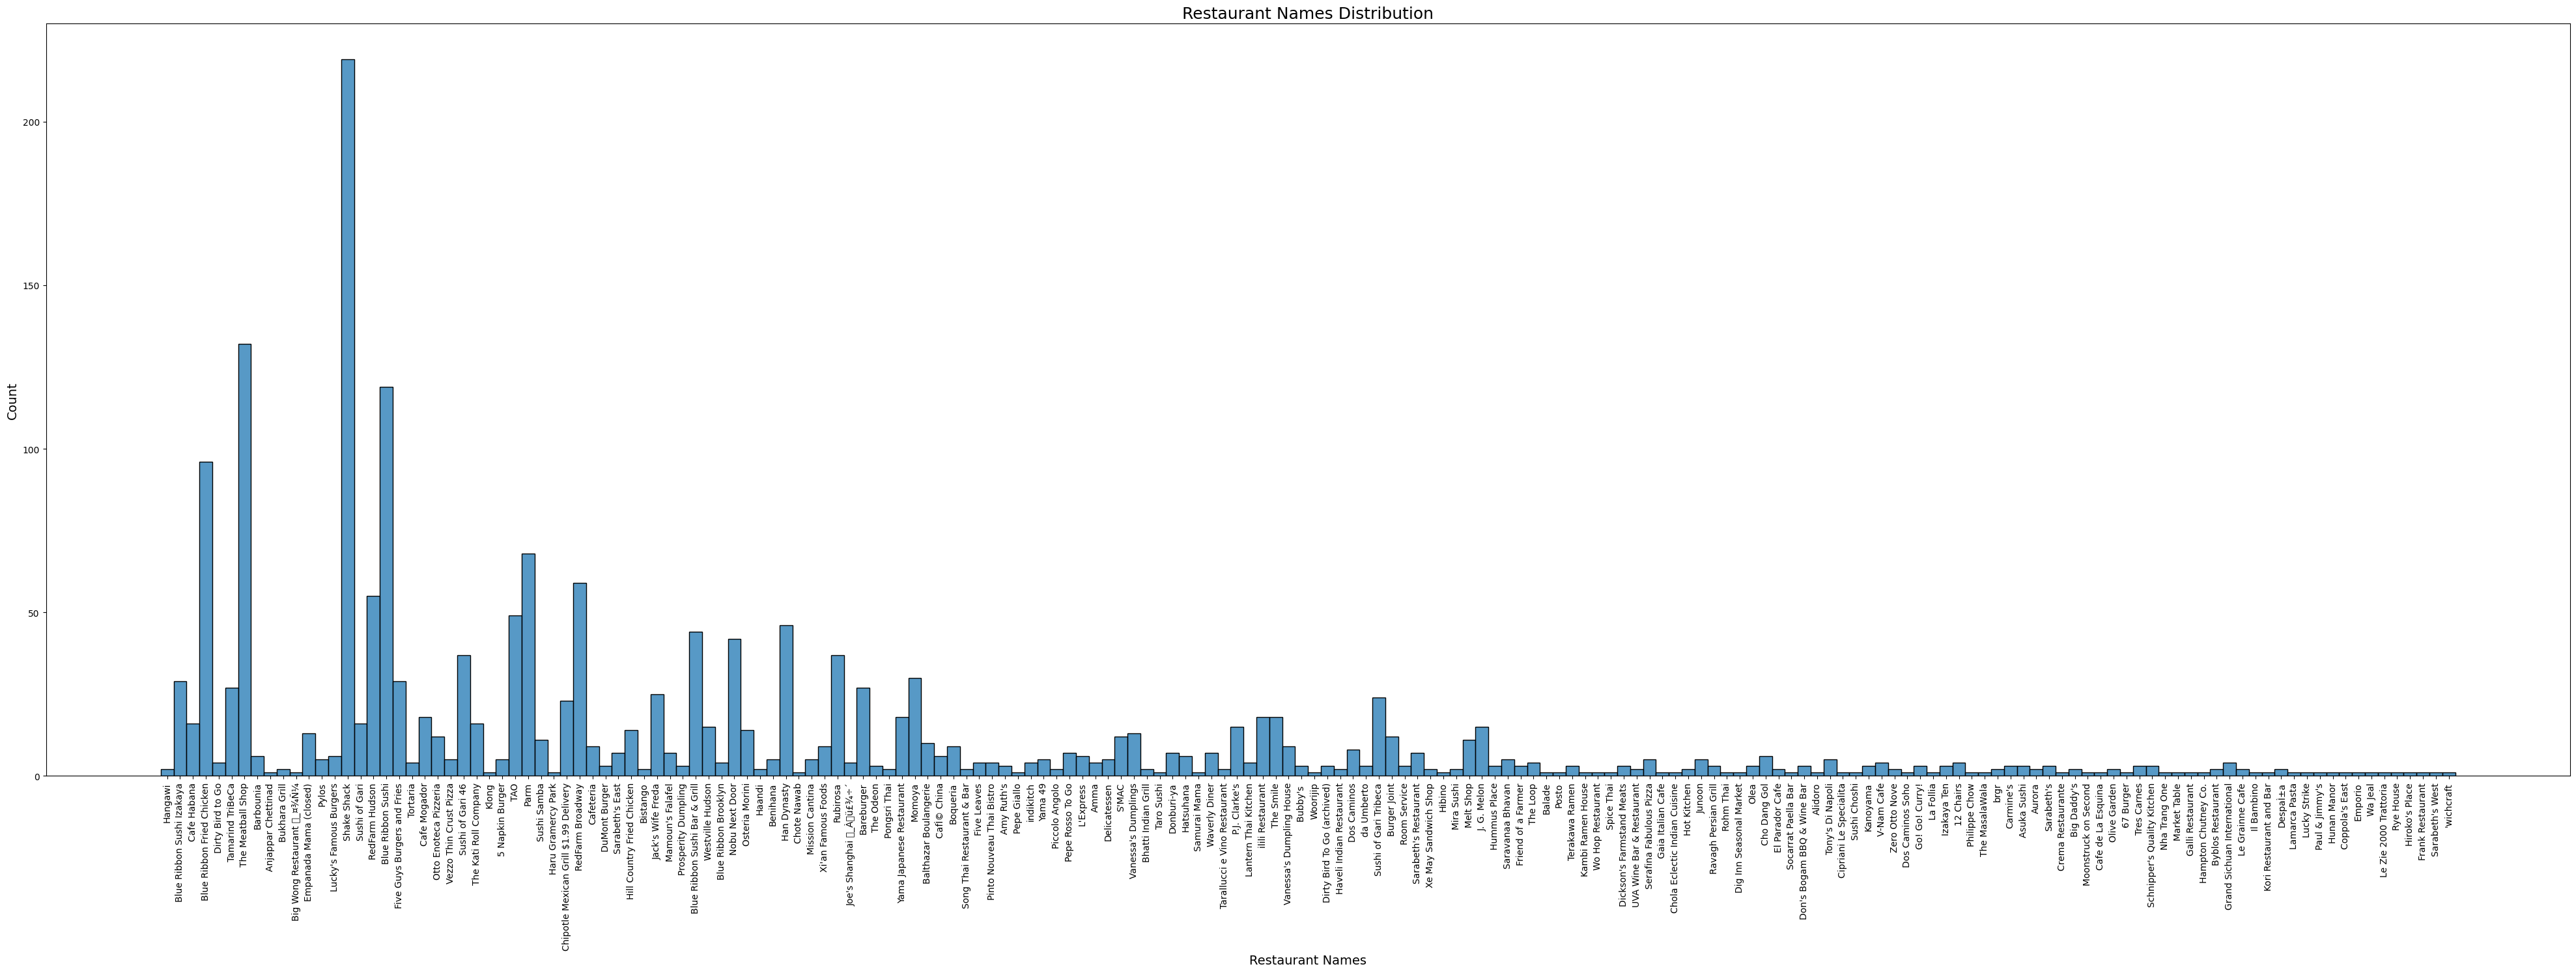

In [ ]:
# Restaurant Names distribution plot.
plt.figure(figsize=(50,15))
sns.histplot(df.restaurant_name)
plt.title('Restaurant Names Distribution',size=18)
plt.xlabel('Restaurant Names',size=14)
plt.ylabel('Count',size=14)
plt.xticks(rotation=90)
plt.show()

#### **Observations:**

Using the **sns.distplot()** function returns a distribution plot that shows the distribution and kernel density allowing us to analyse the distribution of the variables (Cost of orders, Food preparation time, and Delivery time)  and the kernel density estimation in order to estimate the probability of the variables.

**sns.histplot()** returns a comparison graph that allows the vizualitation of the different ranges of the variables (day of the week, cuisine type and restaurant names)

- We can see that the **"Cost of the Orders"** graph looks like the Right-Skewed Distribution graph. Most of the orders range from 10 - 15 dollars.

- In the **"Food Preparation Time"** graph we can see that the distribution looks like a uniform distribution

- In the **"Delivery Time Distribution"** graph we can see that the distribution simulates a Left-Skewed Distribution graph. Most of the orders have a delivery time of 25 - 30 minutes.

- In the **"Day o fthe Week"** distribution graph we can see that the majority of the orders have been made on the weekend rather than on the weekdays

- In the **"Cuisine Type"** we can see that mos recurrent types of cuisine are the Japanese, American, Italian and Chinese with more than 200 orders

- **sns.histplot()** allows us to generate a graph ilustrating the vast amount of restaurant from where the data was extracted


### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received?

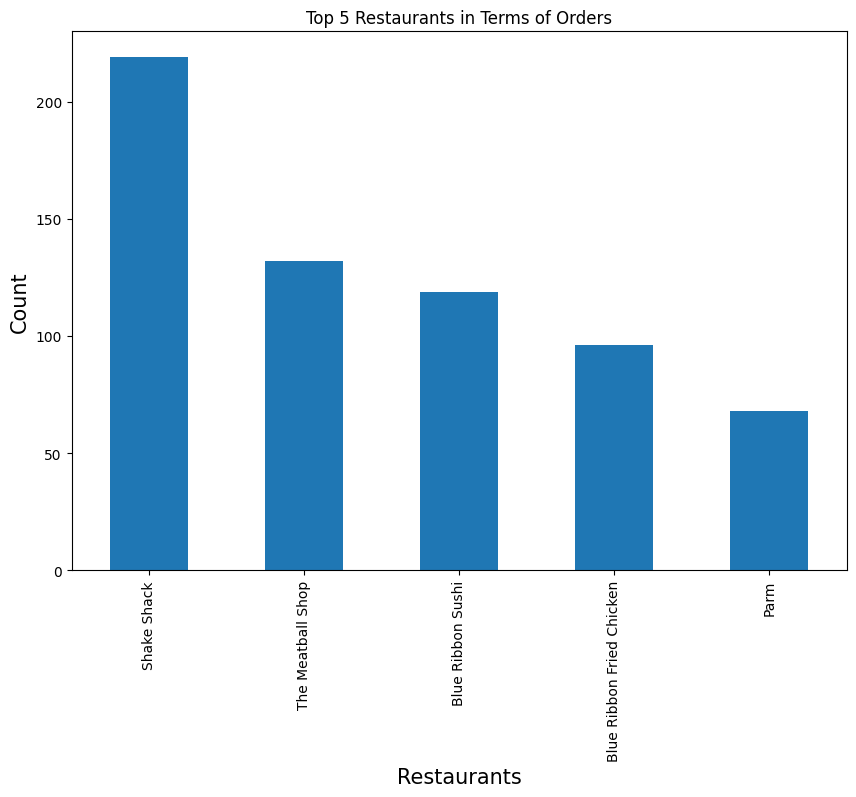

In [ ]:
# "DataFrame[].value_counts().head()" returns the top 5 values of a column.
# ".plot(kind='bar')" creates a bargraph with the values returned.
plt.figure(figsize=(10,7))
df['restaurant_name'].value_counts().head().plot(kind='bar')
plt.title('Top 5 Restaurants in Terms of Orders')
plt.xlabel('Restaurants', size=15)
plt.ylabel('Count', size=15)
plt.show()

#### **Observations:**
The Bargraph allows us to identify through the function
**df['restaurant_name'].value_counts().head().plot(kind='bar')** that the top 5 restaurants are, Shake Shack, The Meatball Shop, Blue Ribbon Sushi, Blue Ribbon Sushi, and Parm respectively.

### **Question 8**: Which is the most popular cuisine on weekends?

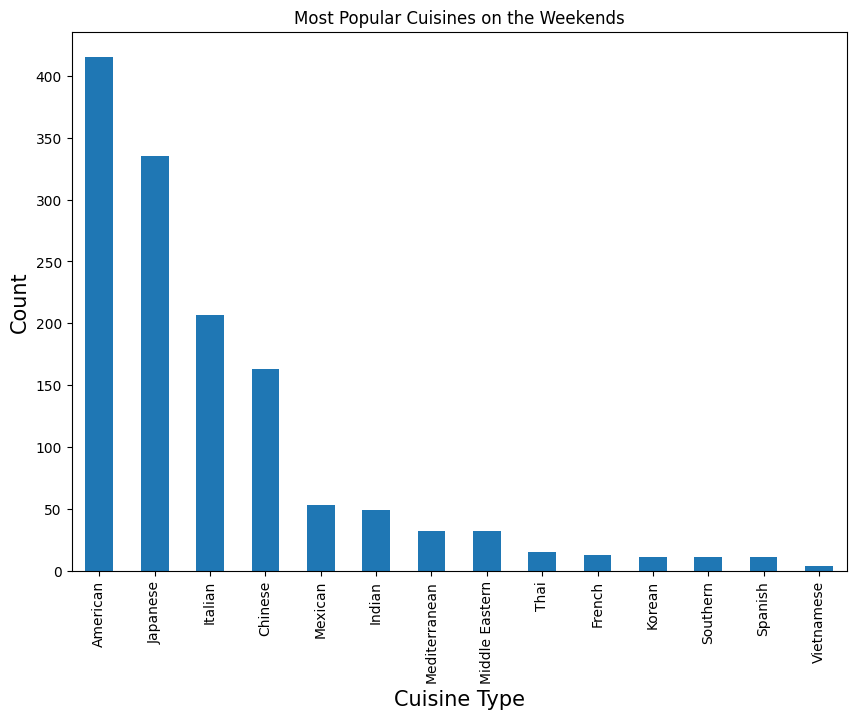

In [ ]:
# We filter the DataFrame with the condition "weekend_data = df[df['day_of_the_week'] == 'Weekend']."
# Then we count the frequency and we graph it with "cuisine_counts = weekend_data['cuisine_type'].value_counts().plot(kind='bar')."
plt.figure(figsize=(10,7))
weekend_data = df[df['day_of_the_week'] == 'Weekend']
cuisine_counts = weekend_data['cuisine_type'].value_counts().plot(kind='bar')
plt.title('Most Popular Cuisines on the Weekends')
plt.xlabel('Cuisine Type', size=15)
plt.ylabel('Count', size=15)
plt.show()

#### **Observations:**
By creating a conditidion where **df['day_of_the_week'] == 'Weekend'** we are able to filter the dataframe values to return only those for 'Weekend' allowing us to use value_counts() in order to return a count of the frequencies where we can see that the most popular cuisine on weekends is the American cuisine.

### **Question 9**: What percentage of the orders cost more than 20 dollars?

In [ ]:
# "df[df['cost_of_the_order'] > 20]" filters the data based on stablished condition.
# "cost_orders_more_than_20_data['cost_of_the_order'].count()" returns the total count of a column in a dataframe
cost_orders_more_than_20_data = df[df['cost_of_the_order'] > 20]
total_more_than_20 = cost_orders_more_than_20_data['cost_of_the_order'].count()
total_cost_of_orders = df['cost_of_the_order'].count()
percentage_of_more_than_20_orders = ( total_more_than_20 / total_cost_of_orders ) * 100
print(percentage_of_more_than_20_orders)

29.24130663856691


#### **Observations:**
To find the percentage of orders that cost more than 20 dollars, you need to follow these steps:

1. First, you need to filter the data where the cost of the order is more than 20 dollars. You can use a boolean mask for this.

2. After filtering the data, you need to count the number of orders that cost more than 20 dollars. You can use the count() function for this.

3. Then, you need to find the total number of orders in the dataset. Again, you can use the count() function for this.

4. Finally, you can calculate the percentage by dividing the number of orders that cost more than 20 dollars by the total number of orders and then multiplying by 100.

The percentage of orders that cost more than 20 dollars is 29.24%

### **Question 10**: What is the mean order delivery time?

In [ ]:
# "mean()" function returns the average input value
DTM = df['delivery_time'].mean()
print(DTM)

24.161749209694417


#### **Observations:**
**.mean()** functions returns a value of 24.16 which means that the average time it takes to deliver an order is 24 minutes

### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed

In [ ]:
# "value_counts()" returns information about the number of times a value repeats itself
# ".head(3)" returns the top 3 values
Top_3_customers = df['customer_id'].value_counts().head(3)
print(Top_3_customers)

52832    13
47440    10
83287     9
Name: customer_id, dtype: int64


#### **Observations:**
**"df['customer_id'].value_counts().head(3)"** returns the Top 3 customers and the amount of times they appear in the dataframe, or in other words, the number of orders they placed.

1. customer_id = 52832 , number of orders = 13

2. customer_id = 47440 , number of orders = 10

3. customer_id = 83287 , number of orders = 9

### **Multivariate Analysis**

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables)

In [ ]:
# .corr() returns a matrix of correlation between the quantitative or categorical variables.
corr_matrix = df.corr()

corr_matrix

,order_id,customer_id,cost_of_the_order,food_preparation_time,delivery_time
order_id,1.000000,-0.013960,0.021171,-0.007026,0.009690
customer_id,-0.013960,1.000000,-0.001322,-0.030330,-0.009885
cost_of_the_order,0.021171,-0.001322,1.000000,0.041527,-0.029949
food_preparation_time,-0.007026,-0.030330,0.041527,1.000000,0.011094
delivery_time,0.009690,-0.009885,-0.029949,0.011094,1.000000


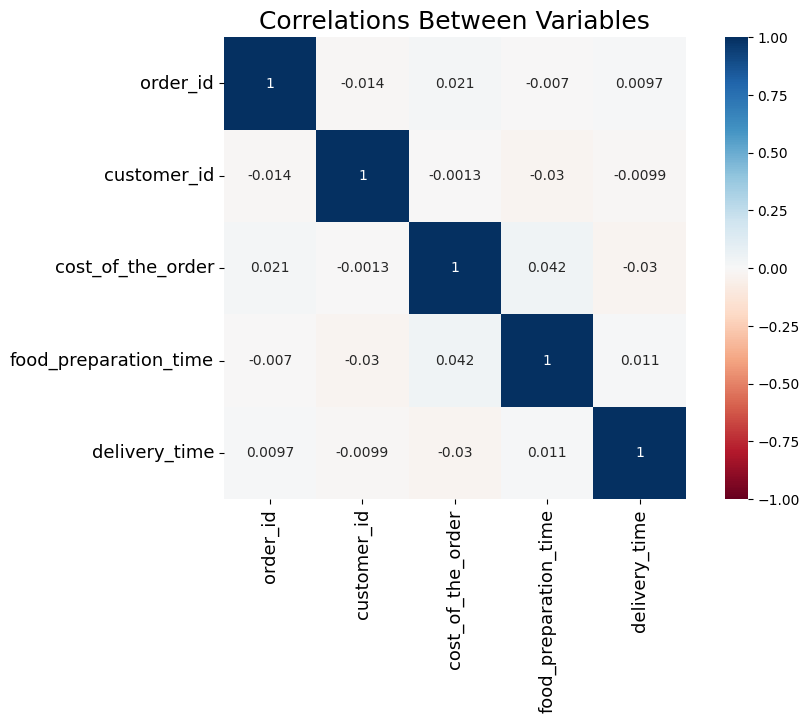

In [ ]:
# We combine the .corr() matrix with sns.heatmap() to vizualize the relationship in a graph.
plt.figure(figsize = (10,6))
sns.heatmap(corr_matrix, annot = True, square = True,
            cmap= 'RdBu',
            vmax= 1,
            vmin= -1)
plt.title('Correlations Between Variables',size=18);
plt.xticks(size=13)
plt.yticks(size=13)

# display the plot
plt.show()

#### **Observations:**
The heatmap shows us that there is a correlation between some variables:

 - the correlation between cost_of_the_order and food_preparation_time shows that based on the cost of the order there will be either an increase or a decrease in the time to finish said order, most likely based on the complexity of the order.

 - the correlation between delivery_time and cost_of_the_order shows that the time needed to deliver an order will depend on the complexity of this, and that means in cost terms, that the more expensive an order, the more time it will require to be prepared and delivered and vice versa.

### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer

In [ ]:
# df.replace() allows us to change str values in order to perform analysis.
# pd.to_numeric() changes the 'rating' column to numeric values.
# df.groupby().agg() groups the dtaframe based on a column and returns values based on agg arguments.
# 'R_Group_Criteria' is a condition used to return the interested values.
df.replace("Not given", np.nan, inplace=True)
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')
R_Group = df.groupby('restaurant_name').agg(['count', 'mean'])
R_Group_Criteria = R_Group[(R_Group['rating']['count']>50) & (R_Group['rating']['mean']>4)]
R_Group_Criteria['rating']

,count,mean
restaurant_name,,
Blue Ribbon Fried Chicken,64,4.328125
Blue Ribbon Sushi,73,4.219178
Shake Shack,133,4.278195
The Meatball Shop,84,4.511905


#### **Observations:**
We can see that by grouping the dataframe and by aggregating the argument ['count', 'mean'] python returns a database filter with those conditions, and by further filtering in 'R_Group_Criteria' we can then return the restaurants that fit the criteria "more than 50 rating with an average rating of more tham 4" which are:
- Blue Ribbon Fried Chicken
- Blue Ribbon Sushi
- Shake Shack
- The Meatball Shop

### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders

In [ ]:
Rev_20_Group = df[(df['cost_of_the_order']>20)]
Rev_20_Group['cost_of_the_order'].sum()
Rev_25 = Rev_20_Group['cost_of_the_order'].sum() * 0.25

Rev_5_Group = df[(df['cost_of_the_order']<20) & (df['cost_of_the_order']>5)]
Rev_5_Group['cost_of_the_order'].sum()
Rev_15 = Rev_5_Group['cost_of_the_order'].sum() * 0.15

print('25% Revenue =', Rev_25, ',',
      '15% Revenue =', Rev_15, ',',
      'Total Net Revenue =', Rev_25 + Rev_15)

25% Revenue = 3688.7275 , 15% Revenue = 2477.5755000000004 , Total Net Revenue = 6166.303


#### **Observations:**
The Total revenue for the orders that cost more than 20 dollars (25%) is: 3688.7275

The Total revenue for the orders that cost more than 5 dollars but less than 20 (15%) is: 2477.5755000000004

Thus the Total Revenue generated by all the orders (25%+15%) is : 6166.303


### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered)

In [ ]:
# Create a new column 'total_time' in the dataframe which is the sum of 'food_preparation_time' and 'delivery_time'.
# Count the number of orders where 'total_time' is more than 60 minutes. Let's call this 'delayed_orders'.
# Calculate the total number of orders in the dataset. Let's call this 'total_orders'.
# The percentage of orders that take more than 60 minutes to get delivered can be calculated as (delayed_orders/total_orders)*100.

df['total_time'] = df['delivery_time'] + df['delivery_time']
delayed_orders = df[df['total_time']>60].shape[0]
#149
total_orders = df.shape[0]
#1898
Percentage_of_orders = (delayed_orders/total_orders)*100.
Percentage_of_orders

7.8503688092729185

#### **Observations:**
The resulting percentage after calculating the total number of orders above 60 minutes and general total is 7.85%

7.85% is the total amount of orders that take more than 60 minutes to be delivered

### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends?

In [ ]:
# First, you need to group your DataFrame by the 'day_of_the_week' column. This will create a GroupBy object.
# Then, you can select the 'delivery_time' column from this GroupBy object. This will give you a SeriesGroupBy object.
# Finally, you can use the mean() function on this SeriesGroupBy object to calculate the mean delivery time for each group (i.e., weekdays and weekends).
DW_Group = df.groupby('day_of_the_week')
DT_Group = DW_Group['delivery_time'].mean()
DT_Group

day_of_the_week
Weekday    28.340037
Weekend    22.470022
Name: delivery_time, dtype: float64

#### **Observations:**
The mean delivery time is:
- on the weekdays: 28.34 minutes
- on the weekends: 22.47 minuts

There is a variation of nearly 6 minutes

## **Conclusion and Recommendations**

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations)

### **Conclusions:**
* By realizing the Univariate Analysis we were able to see the diferent patterns of distribution in the dataframe, we could see the distribution of orders (the orders that are most likely to be bought), thed day of the week distribution ( the days in which there's more movement), which are the Top 5 restaurants or the Top 3 customers and others.

* By realizing the Multivariate Analisys on the other hand, we were able to see the relationships between the diferent variables and how the interacted with each other, like the correlation of the cost of the order with its time to prepare where we can infer that the more expensive the order, the more complex and thus the longer it takes to prepare, we were also able to answer some of the needs of the company like the desire of providing promotional offers to a specified number of restaurants or the information about the total revenues based on a criteria

### **Recommendations:**

* Based on the feedback of the most pupular cuisines, I would recomend the company to asses the reasons as to why are some types of cuisine that low in the graph compared to the other, depending on that they could offer any sort of help to these restaurants if needed

* Also basing only on ratings the should probably keep a closer eye on the restaurants with lower ratings in order to determine the reasons behind those ratings, that way they could offer assistance and improve the ratings and the revenues.

 ---